## The Role of Language in Tourist- Google Maps Reviews 


 The objective is to explore how the language of the review—Arabic or English—affects the sentiment and content expressed by the reviewers. By comparing sentiment analysis and key themes or keywords in both languages,  identifying differences in expectations or satisfaction levels between local and international tourists, offering insights into how language influences their experiences and perceptions of tourist destinations.


In [1]:
import pandas as pd

df = pd.read_csv('ProcessedData.csv')

1. we used pre-trained BERT models for sentiment analysis on reviews in both Arabic and English. First, we loaded separate models for Arabic and English using the Hugging face Transformers library. We then created sentiment analysis pipelines for each language. For each review in the dataset, we detected the language (Arabic or English) using the langdetect library and stored the language in a new column. This process helps in analyzing the sentiment of reviews based on their language, allowing further analysis of sentiment differences between local (Arabic) and international (English) tourists.

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from langdetect import detect
import pandas as pd

# Load Arabic BERT model and tokenizer
arabic_model_name = "asafaya/bert-base-arabic"
arabic_tokenizer = AutoTokenizer.from_pretrained(arabic_model_name)
arabic_model = AutoModelForSequenceClassification.from_pretrained(arabic_model_name, num_labels=2)

# Load English BERT model and tokenizer
english_model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
english_tokenizer = AutoTokenizer.from_pretrained(english_model_name)
english_model = AutoModelForSequenceClassification.from_pretrained(english_model_name)

# Create sentiment analysis pipelines
arabic_sentiment = pipeline("sentiment-analysis", model=arabic_model, tokenizer=arabic_tokenizer)
english_sentiment = pipeline("sentiment-analysis", model=english_model, tokenizer=english_tokenizer)

# Assuming df has a column 'text' containing the reviews
df['language'] = None  # New column to store detected language
df['sentiment'] = None  # New column to store sentiment analysis results

# Detect language and analyze sentiment
for idx, row in df.iterrows():
    text = row['text']
    try:
        language = detect(text)  # Detect language
    except:
        language = "unknown"  # Default if detection fails

    # Update the language column
    df.at[idx, 'language'] = language

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2. In this part, we used Hugging Face’s pre-trained models to analyze sentiment in Google Maps reviews written in Arabic and English. The language of each review is first detected using the langdetect library. Based on the detected language, the corresponding BERT-based sentiment analysis model is applied: an Arabic model for Arabic reviews and a multilingual English model for English reviews. Sentiment is classified as "positive" or "negative" based on the model's output, and unsupported languages are flagged. This process allows us to assess and compare sentiments from local and international visitors.

In [3]:
for idx, row in df.iterrows():
    text = row['text']
    try:
        language = detect(text)  # Detect language
    except:
        language = "unknown"  # Default if detection fails

    # Perform sentiment analysis based on detected language
    if language == "ar":
        sentiment = arabic_sentiment(text, truncation=True, padding=True)[0]  # Truncate and pad the text
        # Assign sentiment as positive or negative based on score
        if sentiment['label'] == 'LABEL_1':  # assuming LABEL_1 is negative in Arabic model
            df.at[idx, 'sentiment'] = "negative"
        else:
            df.at[idx, 'sentiment'] = "positive"
    elif language == "en":
        sentiment = english_sentiment(text, truncation=True, padding=True)[0]  # Truncate and pad the text
        # Map sentiment based on the model's label (adjust as needed)
        if sentiment['label'] in ['1', '2', '3']:  # These labels might indicate negative sentiments
            df.at[idx, 'sentiment'] = "negative"
        else:
            df.at[idx, 'sentiment'] = "positive"
    else:
        df.at[idx, 'sentiment'] = "Unsupported language"

# Print or save the DataFrame to verify language and sentiment columns
print(df.head())


# Print unique values in the sentiment column
unique_sentiments = df['sentiment'].unique()

# Output the unique values
print("Unique sentiment values:", unique_sentiments)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


   islocalguide            name  stars  \
0             1  Shabbir Husain    5.0   
1             1   Kaptain Guzzy    4.0   
2             1      M-S Shaikh    5.0   
3             1   Joferd Pineda    5.0   
4             1    Afif Chougle    5.0   

                                                text  totalscore    year  \
0  Awesome experience of Bujairi terrace, a rich ...         4.6  2024.0   
1  Lovely collection of restaurants, eateries and...         4.6  2024.0   
2  Bujairi Al-Turaif is a very luxurious restaura...         4.6  2024.0   
3  A great place to enjoy the peaceful nature spe...         4.6  2024.0   
4  Amazing experience! We had lots of fun walking...         4.6  2024.0   

   month   day  stars_normalized  totalscore_normalized  ...  \
0    8.0  25.0               1.0               0.857143  ...   
1    9.0  28.0               0.6               0.857143  ...   
2    9.0  23.0               1.0               0.857143  ...   
3    9.0  29.0               1.0  

3. In this part of the project, sentiment analysis is performed on Google Maps reviews, and the results are visualized using a bar chart. The language of each review is detected, and based on whether the review is in Arabic or English, the appropriate sentiment analysis model is applied. Sentiments are classified as "positive" or "negative" based on the models’ outputs. The sentiment and language of each review are stored in separate lists, which are then added to the DataFrame. After that, sentiment distribution is grouped by language and plotted in a stacked bar chart, showcasing the frequency of positive and negative sentiments for both Arabic and English reviews.

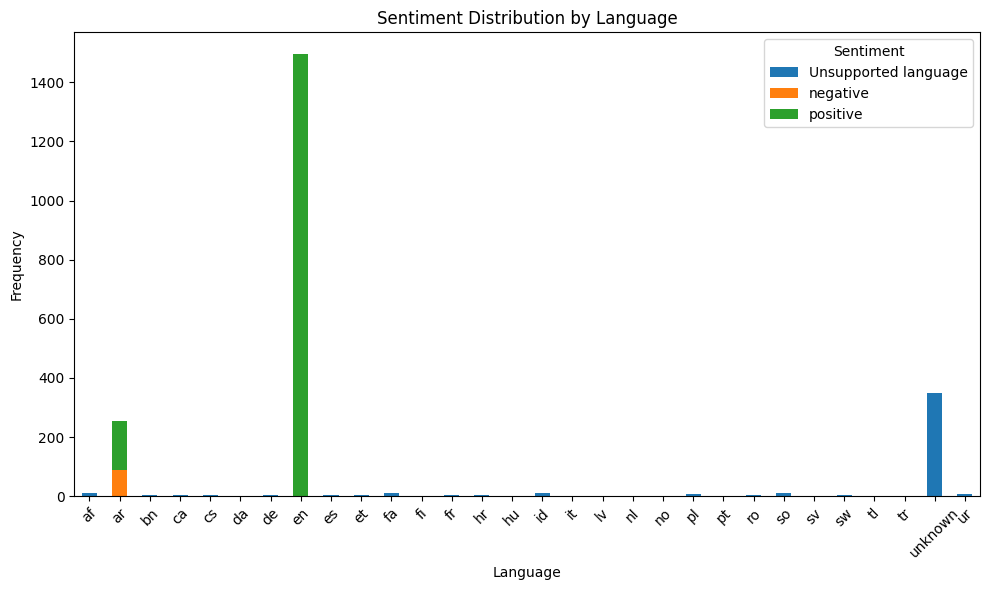

In [4]:
import matplotlib.pyplot as plt

# Initialize lists to store sentiment and language for plotting
sentiment_list = []
language_list = []

# Perform sentiment analysis and store results
for idx, row in df.iterrows():
    text = row['text']
    try:
        language = detect(text)  # Detect language
    except:
        language = "unknown"  # Default if detection fails

    # Perform sentiment analysis based on detected language
    if language == "ar":
        sentiment = arabic_sentiment(text, truncation=True, padding=True)[0]  # Truncate and pad the text
        if sentiment['label'] == 'LABEL_1':  # assuming LABEL_1 is negative in Arabic model
            sentiment_label = "negative"
        else:
            sentiment_label = "positive"
    elif language == "en":
        sentiment = english_sentiment(text, truncation=True, padding=True)[0]  # Truncate and pad the text
        if sentiment['label'] in ['1', '2', '3']:  # These labels might indicate negative sentiments
            sentiment_label = "negative"
        else:
            sentiment_label = "positive"
    else:
        sentiment_label = "Unsupported language"
    
    # Append results to the lists
    sentiment_list.append(sentiment_label)
    language_list.append(language)

# Add results to the DataFrame
df['sentiment'] = sentiment_list
df['language'] = language_list

# Group sentiment by language
sentiment_by_language = df.groupby(['language', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment distribution for each language
sentiment_by_language.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


The chart shows that the number of positive sentiments in English reviews is higher compared to other languages, indicating that English-speaking users tend to leave more positive feedback on the platform. Arabic reviews, on the other hand, exhibit a combination of both positive and negative sentiments, suggesting a more mixed response from Arabic-speaking users. This highlights a contrast in the sentiment trends between the two language groups.

4. the dataset was grouped by language and star ratings, counting the frequency of each language for each star rating. It then generates a stacked bar chart where the x-axis represents the star ratings, the y-axis represents the frequency of reviews, and each bar is divided by language. The plot title, axis labels, and legend provide clarity on how the frequencies of reviews vary by language and rating. The chart is displayed using matplotlib, allowing for an easy visual comparison of review distributions across languages and star ratings.

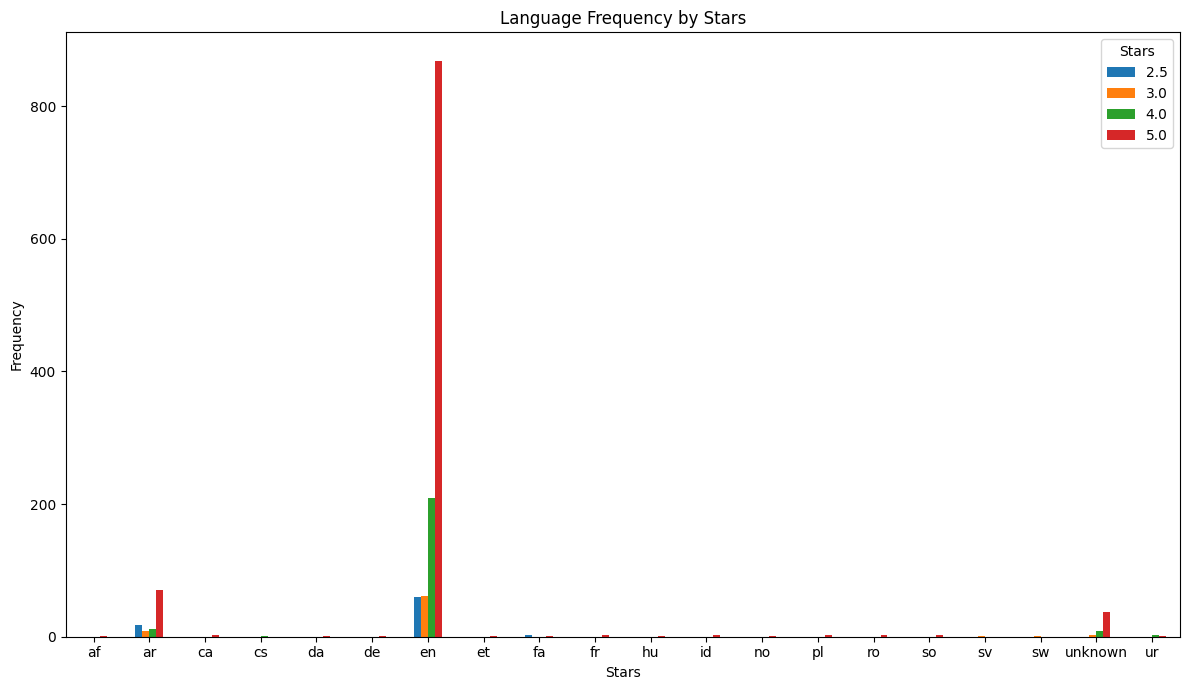

In [5]:
import matplotlib.pyplot as plt

# Group by language and stars, counting the frequency of each combination
language_by_stars = df.groupby(['language', 'stars']).size().unstack(fill_value=0)

# Plot frequency of each language by stars
language_by_stars.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Language Frequency by Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Stars', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


English has the highest frequency of reviews overall, with the majority of reviews receiving a 5-star rating, followed by 4 stars. Ratings of 3.0 and 2.5 are close in frequency. Arabic reviews also have a significant presence, with 5 stars being the most common rating, followed by 2.5 stars, then 4 stars, and finally 3 stars. Additionally, reviews in "unknown" languages show a similar rating distribution, with most reviews rated 5 stars, followed by 4 stars and 3 stars. This suggests that while the language could not be detected, the rating trends closely resemble those of both Arabic and English reviews, with a preference for higher ratings.

This indicates that a larger proportion of the reviews are written in English compared to other languages, suggesting that international visitors might contribute more to the review data. The bar chart effectively highlights this trend by showing a higher count of English reviews in the plot.

5.   dataset was processed to analyze the frequency of various categories across different languages. It identifies the category columns (those starting with "categories_") and calculates how often each category occurs for each language (such as English, Arabic, etc.). A horizontal bar chart is generated for each category, displaying the frequency of each language's occurrences. These charts are arranged into subplots, one for each category, with each language represented by a distinct color. The layout is optimized for better readability, and appropriate titles, labels, and legends are included for clarity. This analysis helps understand how categories are distributed across languages in the dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_24600\2397212803.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Languages', fontsize=12, loc='upper right')
C:\Users\HP\AppData\Local\Temp\ipykernel_24600\2397212803.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Languages', fontsize=12, loc='upper right')
C:\Users\HP\AppData\Local\Temp\ipykernel_24600\2397212803.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Languages', fontsize=12, loc='upper right')
C:\Users\HP\AppData\Local\Temp\ipykernel_24600\2397212803.py:35: UserWarning: No arti

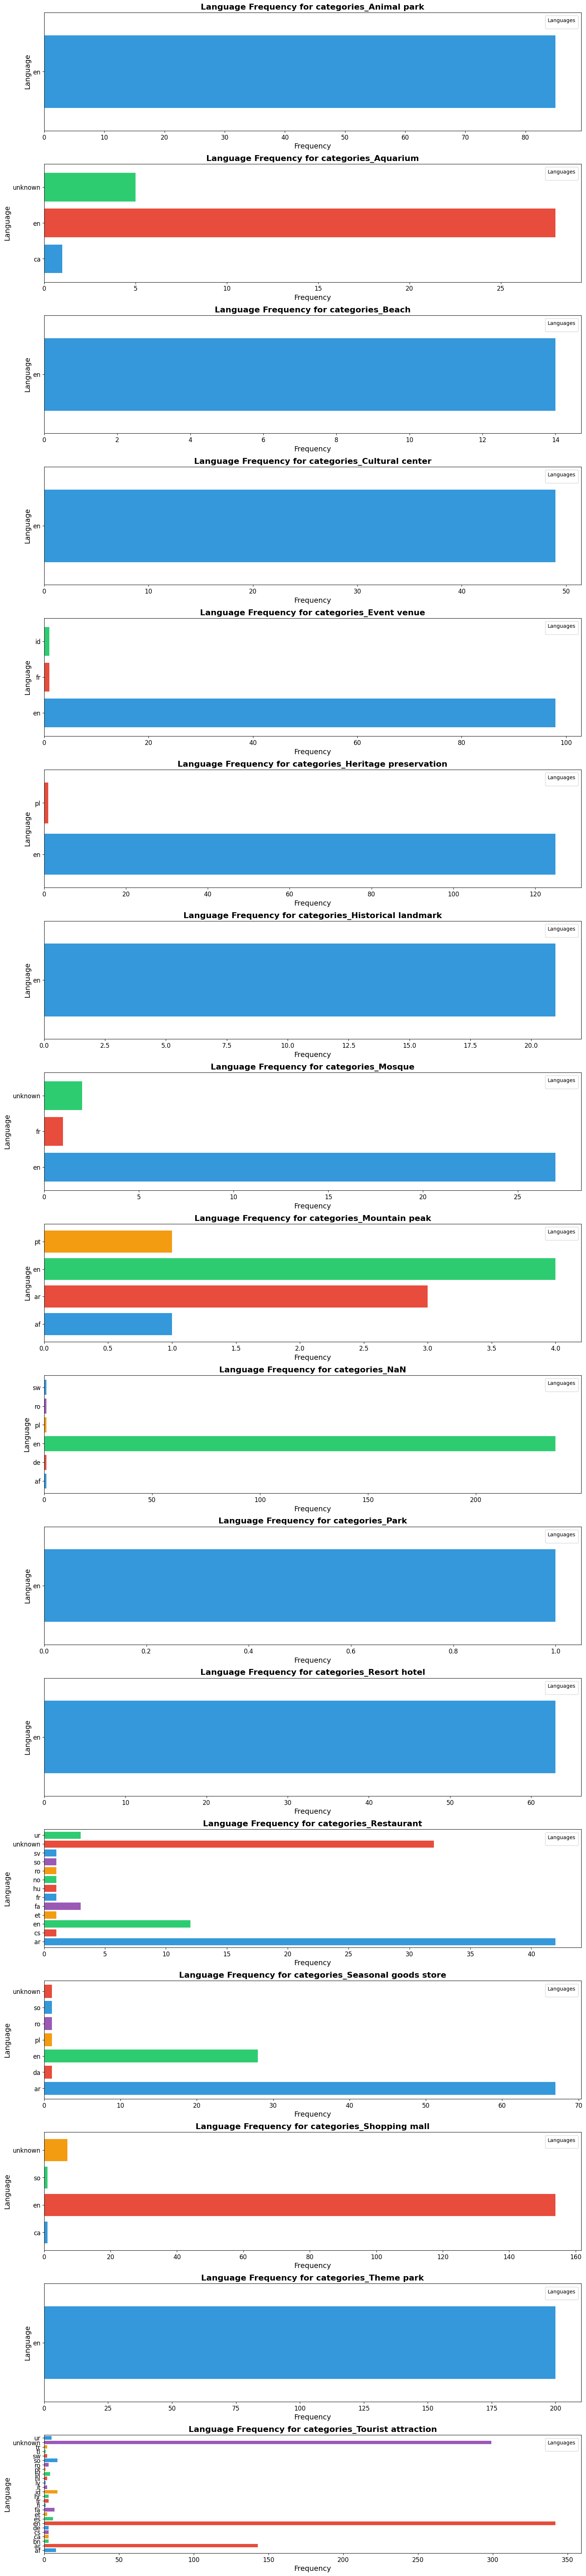

In [6]:
import matplotlib.pyplot as plt

# Select the category columns
category_columns = [col for col in df.columns if col.startswith('categories_')]

# Initialize a dictionary to store frequency data
category_language_freq = {}

# Count the frequency of each category for each language
for category in category_columns:
    # Filter only rows where the category is True
    category_data = df[df[category] == True].groupby(['language']).size()

    # Store the frequency data for each category
    category_language_freq[category] = category_data

# Create a larger figure size for better readability (increasing the height)
fig, axes = plt.subplots(len(category_columns), 1, figsize=(16, 150 * len(category_columns)))

# If there's only one category, the axes is not a list, so we handle it separately
if len(category_columns) == 1:
    axes = [axes]

# Plot the data
for idx, category in enumerate(category_columns):
    # Plot horizontal bar chart for each category
    category_language_freq[category].plot(kind='barh', ax=axes[idx], figsize=(16, 70), width=0.8, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'])
    
    # Set titles and labels for better clarity
    axes[idx].set_title(f'Language Frequency for {category}', fontsize=16, weight='bold')
    axes[idx].set_xlabel('Frequency', fontsize=14)
    axes[idx].set_ylabel('Language', fontsize=14)
    axes[idx].tick_params(axis='y', labelsize=12)
    axes[idx].tick_params(axis='x', labelsize=12)
    axes[idx].legend(title='Languages', fontsize=12, loc='upper right')

# Adjust the layout for better fitting
plt.tight_layout(pad=1.0)  # Use padding to ensure no overlap
plt.show()


This analysis provides insights into the language distribution across various review categories, showing trends in language use across different venue types:

- In Animal Park and Aquarium, English has the highest frequency, with Catalan and unknown languages following.

- Beach, Cultural Center, Historical Landmark, Park, and Resort Hotel categories all show English as the most frequently used language.

- Event Venue sees English as the most common language, followed by French and Indonesian.

- For Heritage Preservation, English is the most frequent, with Polish reviews appearing less often.

- In Mosque, English dominates, followed by unknown languages and French.

- Mountain Peak has English as the highest frequency, with Arabic second, and Portuguese and Afrikaans tied.

- NaN and Shopping Mall categories both have English as the most frequent language, followed by unknown languages, with Catalan (ca) and Somali (so) tied for lower frequencies in Shopping Mall.

- In Restaurant, Arabic reviews are most frequent, followed by unknown languages, English, and French and Urdu tied, with lower frequencies in Swedish (sv), Slovak (sk), Romanian (ro), Norwegian (no), Hungarian (hu), Estonian (et), and Czech (cs).

- For Seasonal Goods Store, Arabic leads, followed by English, with Slovak (sk), Romanian (ro), Polish (pl), and Danish (da) appearing the least.

- In Theme Park and Tourist Attraction, English again has the highest frequency. For Tourist Attraction, unknown languages and Arabic complete the top three.

  Overall, English is the predominant language across most categories, with Arabic showing strong representation in specific categories such as Restaurant and Seasonal Goods Store. This distribution highlights language patterns, showing that English and Arabic are often preferred languages for reviews across a range of venues, while certain categories also see moderate representation from other languages.

6.  topic modeling was performed on a text dataset using Latent Dirichlet Allocation (LDA). It first preprocesses the text by applying TF-IDF vectorization with unigrams and bigrams to capture context. Then, it applies LDA to extract 15 topics, using the top words from each topic to create descriptive labels. Each document is assigned to the topic with the highest probability. The dataset is updated with the topic assignments and corresponding labels. The code calculates the frequency of each topic per language and visualizes the results with a stacked bar chart, ensuring correct rendering of Arabic characters. Finally, the unique topic labels are printed for interpretation.

<Figure size 1600x800 with 0 Axes>

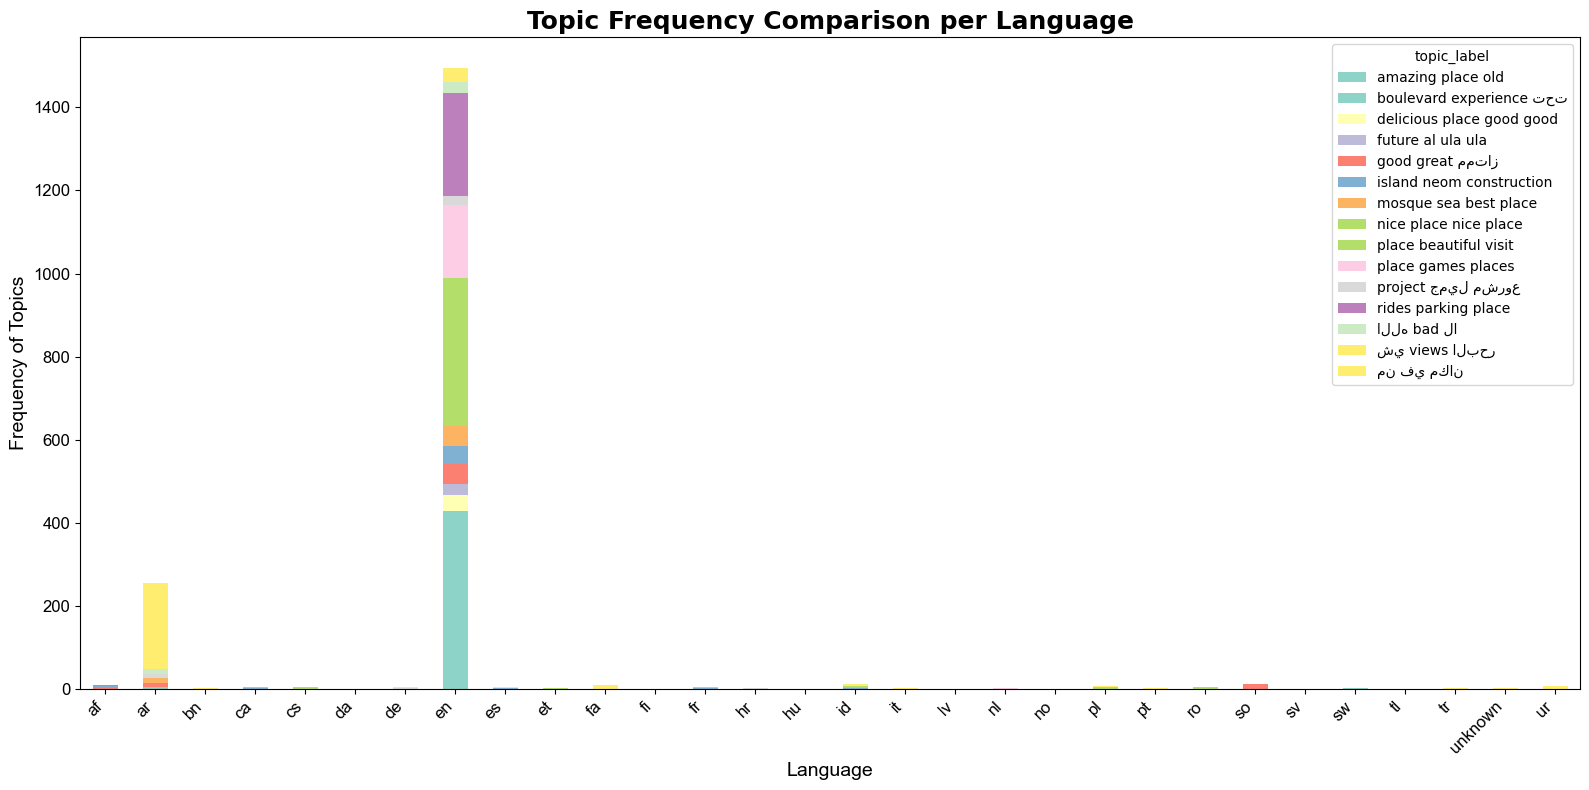

Note: That Matplotlib doen't suppot Arabic font so we choose one that support arabic but it might not work
for readablility you can see the topic bellow
['place beautiful visit' 'rides parking place' 'amazing place old'
 'delicious place good good' 'place games places' 'nice place nice place'
 'boulevard experience تحت' 'من في مكان' 'الله bad لا'
 'mosque sea best place' 'island neom construction' 'good great ممتاز'
 'شي views البحر' 'project جميل مشروع' 'future al ula ula']


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'text' is NaN (missing)
df = df.dropna(subset=['text'])

# Vectorize the text using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)  # Using bigrams as well for better context
X = vectorizer.fit_transform(df['text'])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
n_topics = 15  # Set the number of topics you want to extract
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the terms corresponding to each topic
terms = vectorizer.get_feature_names_out()

# Function to display the top words for each topic and return descriptive topic labels
def get_top_words(model, feature_names, n_top_words):
    topic_labels = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_labels[topic_idx] = " ".join(top_words)  # Create a meaningful label from the top words
    return topic_labels

# Get the descriptive topic labels
topic_labels = get_top_words(lda, terms, 3)

# Assign each document to a topic based on the highest probability
topic_assignments = lda.transform(X)
df['topic'] = topic_assignments.argmax(axis=1)

# Map the topic numbers to the descriptive labels
df['topic_label'] = df['topic'].map(topic_labels)

# Calculate the topic frequency per language
topic_language_freq = df.groupby(['language', 'topic_label']).size().unstack(fill_value=0)

# Plotting the topic frequency comparison by language
plt.figure(figsize=(16, 8))

# Create a bar plot where each bar represents a topic for a given language
topic_language_freq.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set3')

# Set the labels and title for the plot
plt.title('Topic Frequency Comparison per Language', fontsize=18, weight='bold')
plt.xlabel('Language', fontsize=14, fontname='Arial')
plt.ylabel('Frequency of Topics', fontsize=14, fontname='Arial')

# Ensure that the plot uses a font that supports Arabic characters
plt.xticks(rotation=45, fontsize=12, fontname='Arial', ha='right')  # Set the font to one that supports Arabic
plt.yticks(fontsize=12, fontname='Arial')

# If there is Arabic text in the language column, make sure it is rendered correctly
for label in plt.gca().get_xticklabels():
    if 'Arabic' in label.get_text():  # Adjust this condition based on your actual data for Arabic language
        label.set_fontname('Arial')  # Set the font to Amiri or other Arabic-compatible font
        label.set_fontsize(12)
        label.set_horizontalalignment('right')  # Adjust text alignment for RTL languages

# Show the plot
plt.tight_layout()
plt.show()

print('Note: That Matplotlib doen\'t suppot Arabic font so we choose one that support arabic but it might not work')
print('for readablility you can see the topic bellow')
print(df['topic_label'].unique())

The highest frequency topics in English are "nice place," "boulevard experience," "rides parking place," and "place games places." These topics highlight popular aspects of reviews, focusing on the overall appeal of the location, the experience along a boulevard, parking availability for rides, and the presence of game areas, such as amusement parks or entertainment zones.

In arabic, the highest frequency topic is "من في مكان"

Next we save the data for future use:

In [ ]:
df.to_csv('processed_reviews_with_sentiment.csv', index=False)